In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

# 4장 연습 문제

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Data Source : https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

red_path = "../data/winequality-red.csv"
white_path = "../data/winequality-white.csv"

# 화이트 와인에 대한 데이터셋을 1로, 레드 와인에 대한 데이터셋을 0으로 하여 데이터프레임을 병합합니다.
red_df = pd.read_csv(red_path, sep=";")
white_df = pd.read_csv(white_path, sep=";")
white_df['wine_kind'] = 1
red_df['wine_kind'] = 0
result_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'wine_kind']
df = pd.DataFrame(columns=result_col)
df = df.append(white_df)
df = df.append(red_df)
df['quality'] = df['quality'].astype('str')
df['wine_kind'] = df['wine_kind'].astype('int')
origin_df = df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_kind
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### 1. 분류 분석을 수행하기 위한 데이터셋을 분리합니다.

In [5]:
from sklearn.model_selection import train_test_split

In [16]:
train_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality']
x = df[train_cols].values
y = df['wine_kind'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### 2. 로지스틱 회귀 분석으로 분류 모델을 학습합니다.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3. 학습 완료된 모델의 F1 score, recall, precision, accuracy를 평가합니다.

In [19]:
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1] # wine_kind가 "1"인지에 대한 확률을 예측

In [20]:
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.98
Precision : 0.975
Recall : 0.993
F1 : 0.984


### 4. Confusion Matrix를 출력합니다.

In [21]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[300  25]
 [  7 968]]


### 5. AUC & ROC curve를 출력합니다.

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

AUC : 0.990


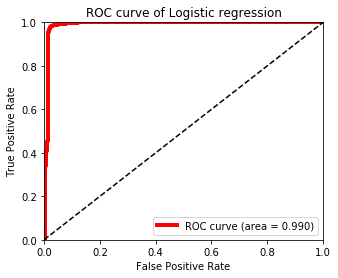

In [24]:
# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--') # 최하 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")